# Jeopardy Analysis

## by Justin Sierchio

In this analysis, we will be looking at the game-show Jeopardy! Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What topics are most likely covered?</li>
    <li>What is the most common answer on Jeopardy?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/tunguz/200000-jeopardy-questions/download. More information related to the dataset can be found at: https://www.kaggle.com/tunguz/200000-jeopardy-questions.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_JEOPARDY = pd.read_csv("JEOPARDY_CSV.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Jeopardy dataset
df_JEOPARDY.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


As a final step, let's list how the dataset defines each of the terms (using the Kaggle definitions).

<ul>
    <li> Show Number:: the production number for that episode of Jeopardy!</li>
    <li> Air Date: the date the episode aired (YYYY-MM-DD).</li>
    <li> Round: the round of Jeopardy - Jeopardy, Double Jeopardy or Final Jeopardy.</li>
    <li> Category: the question category.</li>
    <li> Value: the $ for the question.</li>
    <li> Question: the actual Jeopardy question.</li>
    <li> Answer: the answer to the Jeopardy question.</li>
</ui>

# Data Cleaning

Let's make sure that the data is sufficiently cleaned for analysis. We will begin by looking at some basic statistics.

In [4]:
# What are the data types in the Jeopardy dataset?
df_JEOPARDY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


So we have the episode numers in 64-bit integers and every other variable as an object. Let's check for any 'NaN' or 'null' values.

In [5]:
# Check dataset for 'NaN' or 'null' values
df_JEOPARDY.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        2
dtype: int64

Since we have 2 rows in the 'Answer' column that are 'null' (out of 216,928 rows), we can safely remove those rows without adversely affecting the data quality.

In [6]:
# Remove 'NULL' rows from Jeopardy Dataset
df_JEOPARDY = df_JEOPARDY.dropna()

In [7]:
# Confirm all 'NULL' rows and columns removed
df_JEOPARDY.isnull().sum()

Show Number    0
 Air Date      0
 Round         0
 Category      0
 Value         0
 Question      0
 Answer        0
dtype: int64

Lastly, we will convert the 'Air Date' column into a format more conducive to future analysis.

In [8]:
df_JEOPARDY['Air Year'] = pd.DatetimeIndex(df_JEOPARDY[' Air Date']).year
df_JEOPARDY['Air Month'] = pd.DatetimeIndex(df_JEOPARDY[' Air Date']).month
df_JEOPARDY['Air Day'] = pd.DatetimeIndex(df_JEOPARDY[' Air Date']).day

And now let's reload the 1st 5 rows of the dataset.

In [9]:
# Display 1st 5 rows from Jeopardy dataset
df_JEOPARDY.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Air Year,Air Month,Air Day
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004,12,31
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004,12,31
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004,12,31
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004,12,31
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004,12,31


Now it appears that our data is sufficiently cleaned to conduct a further analysis.

# Exploratory Data Analysis

Now let's look at how many question categories have been used on Jeopardy in this dataset.

In [10]:
# How many question categories on Jeopardy in this dataset?
df_JEOPARDY[' Category'].nunique()

27995

Over the course of this dataset, there have been almost 28,000 categories for questions. What about the number of rounds?

In [11]:
# How many question categories on Jeopardy in this dataset?
df_JEOPARDY[' Round'].nunique()

4

Interestingly enough, we see there are 4 rounds. Let's see the names of those rounds.

In [12]:
# How many question categories on Jeopardy in this dataset?
df_JEOPARDY[' Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!', 'Tiebreaker'],
      dtype=object)

As we can see from the result, there have actually been tiebreaker questions in addition to the typical 3 categories of 'Jeopardy!', 'Double Jeopardy!' and 'Final Jeopardy!'.

Now let's look at the distribution of years for this dataset.

In [13]:
# Distribution of years for Jeopardy dataset
df_JEOPARDY['Air Year'].nunique()

29

In [14]:
# Distribution of years for Jeopardy dataset
df_JEOPARDY['Air Year'].unique()

array([2004, 2010, 2000, 2006, 2009, 1996, 2007, 1997, 2002, 2003, 2001,
       1990, 1999, 2008, 2011, 2005, 1998, 2012, 1992, 1986, 1985, 1991,
       1993, 1994, 1988, 1987, 1995, 1984, 1989], dtype=int64)

So this dataset provides every question and answer on Jeopardy! from 1984 through the end of 2012. Cool!

Now let's begin to answer the questions we set out in our analysis. First, let's find out the most frequently used categories in Jeopardy.

In [15]:
# Find the most frequent categories in Jeopardy!
df_JEOPARDYCategory = df_JEOPARDY[' Category'];
df_JEOPARDYCategory.value_counts().head(20)

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
U.S. CITIES                339
WORLD GEOGRAPHY            338
BODIES OF WATER            327
ANIMALS                    324
STATE CAPITALS             314
BUSINESS & INDUSTRY        311
ISLANDS                    301
WORLD CAPITALS             300
U.S. GEOGRAPHY             299
RELIGION                   297
Name:  Category, dtype: int64

As we can see from the results, common topics for Jeopardy questions include history (American History, World History, History) and geography (U.S. Cities, World Geography, Bodies of Water, State Capitals, Islands, World Capitals, U.S. Geography). Interestingly enough, the most common category is 'Before and After.'

Let's take a look at some of the least common categories.

In [16]:
# Find the least frequent categories in Jeopardy!
df_JEOPARDYCategory = df_JEOPARDY[' Category'];
df_JEOPARDYCategory.value_counts().tail(20)

SPACE NEWS                           1
THEORIES OF SCIENCE                  1
THAT'S YOUNG!                        1
ALL ABOUT CORN                       1
LITERARY INFLUENCES                  1
NORTH AMERICAN BIRDS                 1
1989 NO. 1 HITS                      1
GOVERNMENT OFFICIALS                 1
BESTSELLING NOVELS                   1
AFI LIFE ACHIEVEMENT AWARDS          1
ROYAL RESIDENCES                     1
WORDS IN PHYSICS                     1
WORDS FROM MYTHOLOGY                 1
INFLUENTIAL 19th CENTURY THINKERS    1
AVIATION HISTORY                     1
PLACE NAMES                          1
TOP OF THE POP CHARTS                1
WORDS IN POETRY                      1
POPULAR FICTION                      1
CLASSIC CHILDREN'S LIT               1
Name:  Category, dtype: int64

As can be seen from the results, some of the least frequent categories (which only appeared in 1 episode) include Hollywood Dogs, Olympic Athletes, The Space Shuttle, R-Rated Operas and Pyschology Terms. Fascinating!

Now let's take a look at the most common answers in Jeopardy!

In [17]:
# Find the most frequent categories in Jeopardy!
df_JEOPARDYCategory = df_JEOPARDY[' Answer'];
df_JEOPARDYCategory.value_counts().head(20)

China           216
Australia       215
Japan           196
Chicago         194
France          193
India           185
California      180
Canada          176
Spain           171
Mexico          164
Alaska          161
Italy           160
Hawaii          157
Texas           153
Paris           149
Germany         147
Russia          141
Florida         140
South Africa    139
Ireland         136
Name:  Answer, dtype: int64

Interestingly, the most common answers are places. This observations ties in well with the calculation earlier that showed that geography and history were the most common types of categories.

To wrap up this project, let's determine the most common values for questions in Jeopardy! To accomplish this task, we need to define a couple of processing functions.

In [18]:
# Convert values from objects to integers
def value_filter(value):
    value = value.strip('$')
    value = ''.join(value.split(','))
    return int(value)

In [19]:
# Convert individual values to bins 
# [This eliminates the differences due to non-100 amounts during Daily Doubles and Final Jeopardy]
def bin_values(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

In [20]:
# Apply value_filter to the values column of the Jeopardy dataset
df_JEOPARDY.drop(df_JEOPARDY[df_JEOPARDY[' Value'] == "None"].index, inplace= True)
df_JEOPARDY['value_number'] = df_JEOPARDY[' Value'].apply(value_filter)

In [22]:
# Apply Bins to values column of the Jeopardy dataset
df_JEOPARDY['value_bins'] = df_JEOPARDY['value_number'].apply(bin_values)

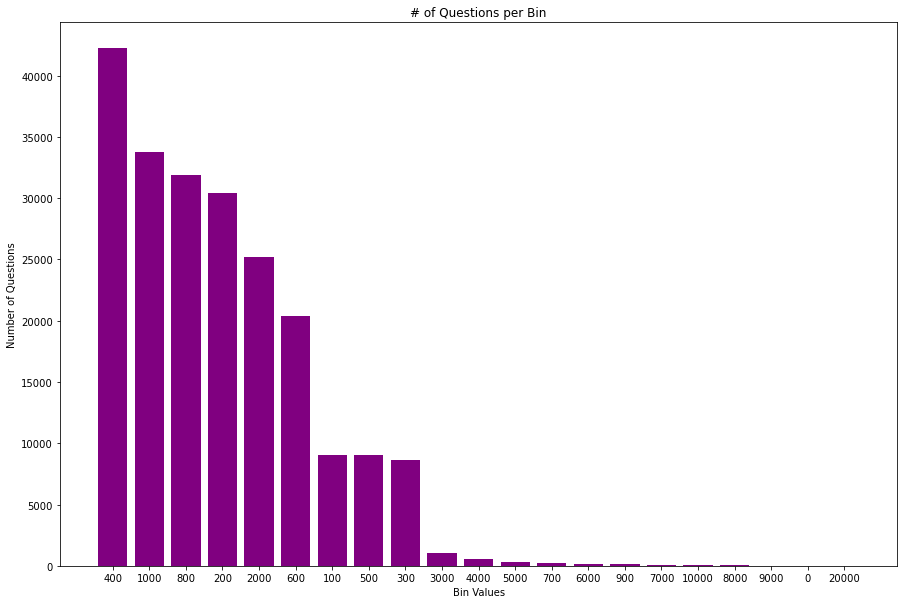

In [25]:
# Plot the value distribution for questions in the Jeopardy dataset

# Create a function for plotting
def plot_dist(data, title, xlabel, ylabel):
    x_pos = np.arange(len(data.keys()))
    plt.figure(figsize=[15,10])
    plt.bar(x_pos, data.values(), color = "purple")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.xticks(x_pos, data.keys())
    
    plt.show()

# Apply function to the dataset
plot_dist(df_JEOPARDY["value_bins"].value_counts().to_dict(),
               '# of Questions per Bin',
               'Bin Values',
               'Number of Questions'
              )

As we can see, the 400 dollar questions are actually the most common, followed by the 1000 dollar and 800 dollar.

## Discussion

In this open-ended project, we were able to show the following:

<ul>
    <li>(1) 400 dollar questions are the most common on Jeopardy.</li>
    <li>(2) 'Before and After' is the most common question on Jeopardy.</li>
    <li>(3) Places are the most common answers.</li>
    <li>(4) Obscure categories include Hollywood Dogs and Pyschology Terms.</li>
</ul>

## Conclusion

The goal of this project was to explore Jeopardy questions. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!